In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [ ]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
train.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


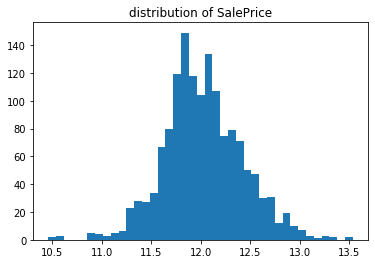

In [ ]:
import math
_=plt.hist(np.log(train['SalePrice']),bins=math.ceil(math.sqrt(len(train))))
_=plt.title('distribution of SalePrice')
plt.show()

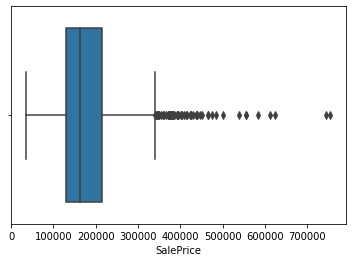

In [ ]:
_=sns.boxplot(x='SalePrice',data=train)
plt.show()

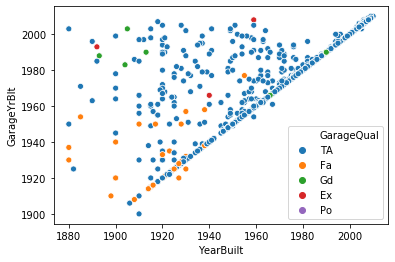

In [ ]:
_=sns.scatterplot(x='YearBuilt',y='GarageYrBlt',hue='GarageQual',data=train)
plt.show()

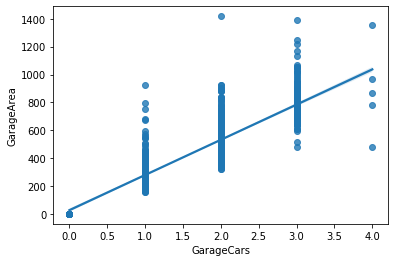

In [ ]:
_=sns.regplot(x='GarageCars',y='GarageArea',data=train)
plt.show()

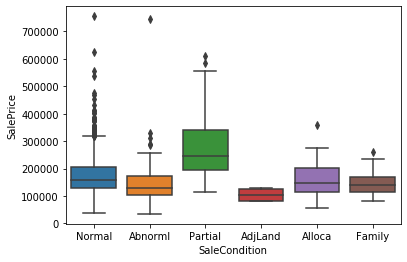

In [ ]:
sns.boxplot(x='SaleCondition',y='SalePrice',data=train)
plt.show()

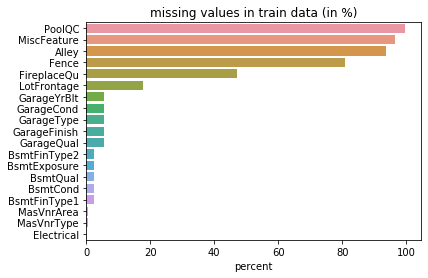

In [ ]:
missing=pd.DataFrame(train.isnull().sum()/len(train)*100,columns=['percent']).sort_values(by='percent',ascending=False)
ax=sns.barplot(x='percent',y=missing.loc[missing['percent']>0].index,data=missing.loc[missing['percent']>0])
_=plt.title('missing values in train data (in %)')
plt.show()

In [ ]:
missing_test=pd.DataFrame(test.isnull().sum()/len(test)*100,columns=['percent']).sort_values(by='percent',ascending=False)
missing_test.loc[missing_test['percent']>0]

,percent
PoolQC,99.794380
MiscFeature,96.504455
Alley,92.666210
Fence,80.123372
FireplaceQu,50.034270
LotFrontage,15.558602
GarageYrBlt,5.346127
GarageQual,5.346127
GarageFinish,5.346127
GarageCond,5.346127


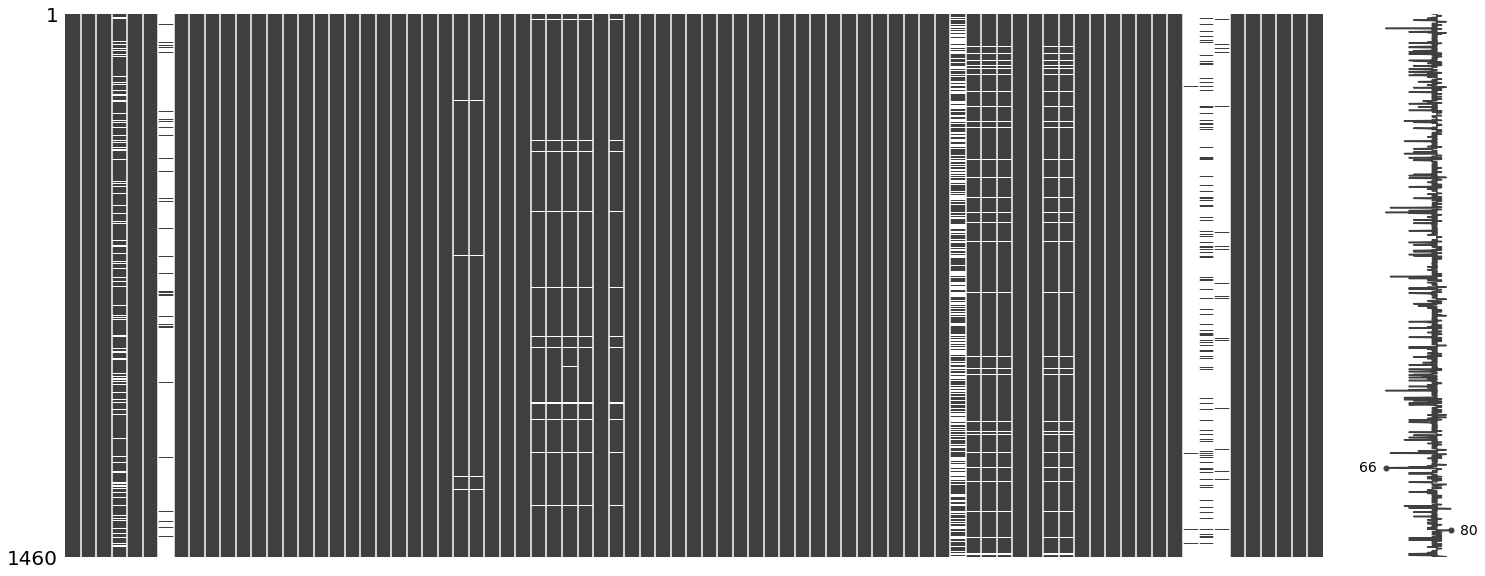

In [ ]:
import missingno
ax=missingno.matrix(train,n=5)
plt.show()

In [ ]:
train.loc[train['PoolQC'].isna()]['PoolArea'].mean()

0.0

In [ ]:
test.loc[test['PoolQC'].isna()]['PoolArea'].mean()

0.9429945054945055

In [ ]:
train['WithaPool']=train['PoolArea']>0
test['WithaPool']=test['PoolArea']>0



train.drop(['PoolQC'],axis=1,inplace=True)
test.drop(['PoolQC'],axis=1,inplace=True)

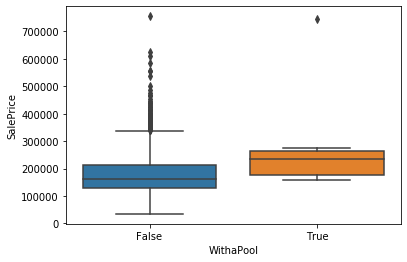

In [ ]:
_=sns.boxplot(x='WithaPool',y='SalePrice',data=train)
plt.show()

In [ ]:
print('Mean Misc Value of missing row of Misc feature in training data : ',train.loc[train['MiscFeature'].isnull()]['MiscVal'].mean())
print('Mean Misc Value of missing row of Misc feature in test data : ',test.loc[train['MiscFeature'].isnull()]['MiscVal'].mean())

Mean Misc Value of missing row of Misc feature in training data :  0.0
Mean Misc Value of missing row of Misc feature in test data :  59.90533807829181


In [ ]:
train['WithaMisc']=train['MiscVal']>0
test['WithaMisc']=test['MiscVal']>0

train.drop(['MiscFeature'],axis=1,inplace=True)
test.drop(['MiscFeature'],axis=1,inplace=True)

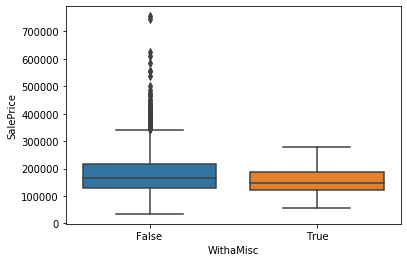

In [ ]:
_=sns.boxplot(x='WithaMisc',y='SalePrice',data=train)
plt.show()

In [ ]:
print('Total of Fireplaces value for FireplaceQu missing row in training data : ',train.loc[train['FireplaceQu'].isnull()]['Fireplaces'].sum())
print('Total of Fireplaces value for FireplaceQu missing row in test data : ',test.loc[test['FireplaceQu'].isnull()]['Fireplaces'].sum())

Total of Fireplaces value for FireplaceQu missing row in training data :  0
Total of Fireplaces value for FireplaceQu missing row in test data :  0


In [ ]:
train['WithaFireplace']=train['Fireplaces']>0
test['WithaFireplace']=test['Fireplaces']>0

train.drop(['FireplaceQu'],axis=1,inplace=True)
test.drop(['FireplaceQu'],axis=1,inplace=True)

[0 1]


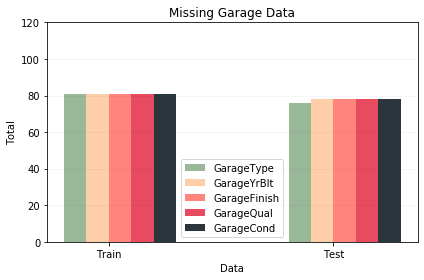

In [ ]:
fig,ax=plt.subplots()
data=np.array(
      [[train['GarageType'].isnull().sum(),
        train['GarageYrBlt'].isnull().sum(),
        train['GarageFinish'].isnull().sum(),
        train['GarageQual'].isnull().sum(),
        train['GarageCond'].isnull().sum()],
       [test['GarageType'].isnull().sum(),
        test['GarageYrBlt'].isnull().sum(),
        test['GarageFinish'].isnull().sum(),
        test['GarageQual'].isnull().sum(),
        test['GarageCond'].isnull().sum()]])
width=0.1
length = len(data)
x_labels = ['Train', 'Test']
x=np.array([0,1])
print(x)
ax.bar(x, data[:,0], width, color='#99B898', label='GarageType')
ax.bar(x + width, data[:,1], width, color='#FECEA8', label='GarageYrBlt')
ax.bar(x + (2 * width), data[:,2], width, color='#FF847C', label='GarageFinish')
ax.bar(x + (3 * width), data[:,3], width, color='#E84A5F', label='GarageQual')
ax.bar(x + (4 * width), data[:,4], width, color='#2A363B', label='GarageCond')

ax.set_ylabel('Total')
ax.set_ylim(top=120)
ax.set_xticks(x + width + width/2)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Data')
ax.set_title('Missing Garage Data')
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.1)
ax.legend()

fig.tight_layout()
plt.show()

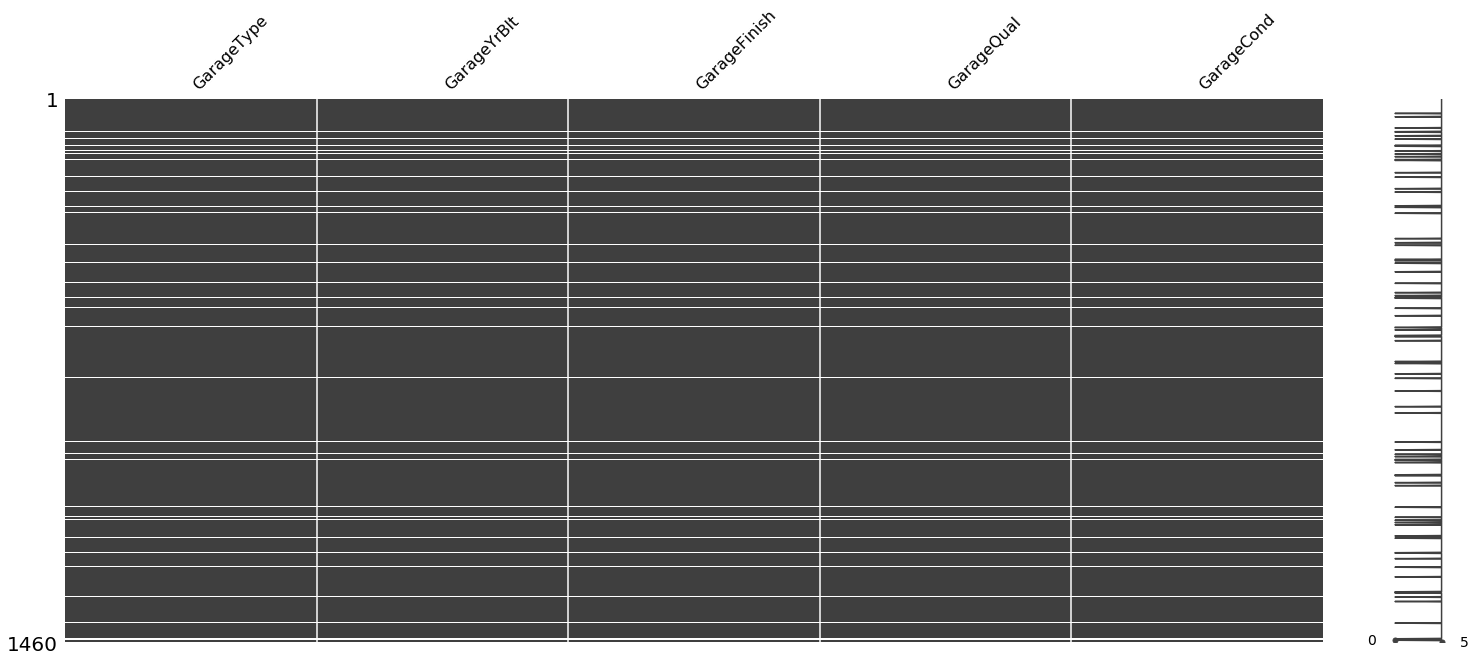

In [ ]:
ax=missingno.matrix(train[['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']])
plt.show()

In [ ]:
print('GarageArea mean of missing Garage "Things" in the training data :',train.loc[train['GarageType'].isna()]['GarageArea'].mean())
print('GarageCar mean of missing Garage "Things" in the training data :',train.loc[train['GarageType'].isna()]['GarageCars'].mean())

print('GarageArea mean of missing Garage "Things" in the test data :',test.loc[test['GarageFinish'].isna()]['GarageArea'].mean())
print('GarageCar mean of missing Garage "Things" in the test data :',test.loc[test['GarageFinish'].isna()]['GarageCars'].mean())

GarageArea mean of missing Garage "Things" in the training data : 0.0
GarageCar mean of missing Garage "Things" in the training data : 0.0
GarageArea mean of missing Garage "Things" in the test data : 4.675324675324675
GarageCar mean of missing Garage "Things" in the test data : 0.012987012987012988


In [ ]:
train[['GarageType','GarageFinish','GarageQual','GarageCond']]=train[['GarageType','GarageFinish','GarageQual','GarageCond']].fillna('NA')

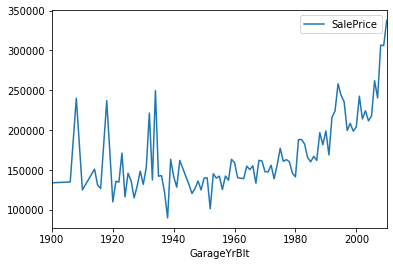

In [ ]:
GrgYrPrice=train[['SalePrice','GarageYrBlt']].groupby('GarageYrBlt').mean()
GrgYrPrice.plot()

In [ ]:
train['GarageYrBlt']=train['GarageYrBlt'].fillna(train['GarageYrBlt'].median())

In [ ]:
test[['GarageType','GarageFinish','GarageQual','GarageCond']]=test[['GarageType','GarageFinish','GarageQual','GarageCond']].fillna('NA')
test['GarageYrBlt']=train['GarageYrBlt'].fillna(train['GarageYrBlt'].median())

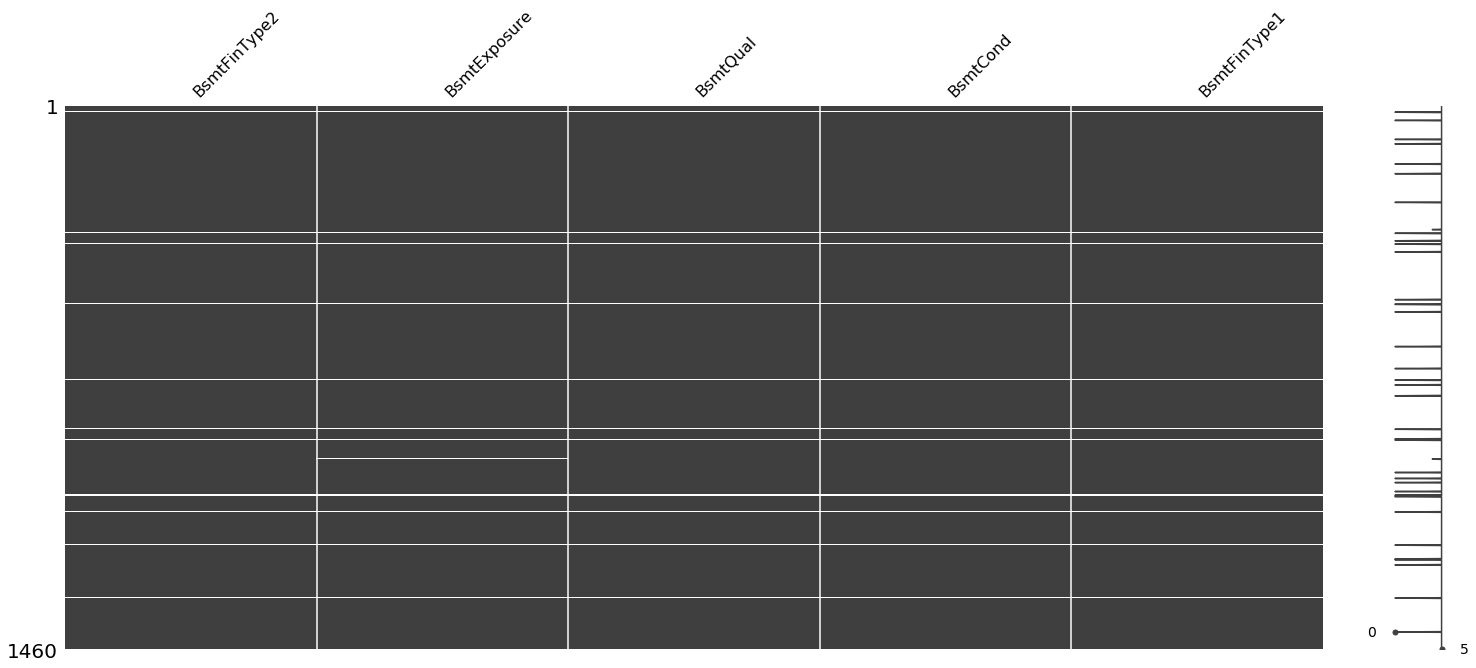

In [ ]:
ax=missingno.matrix(train[['BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond', 'BsmtFinType1']])
plt.show()

In [ ]:
train[['BsmtFinType1','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond']]=train[['BsmtFinType1','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond']].fillna('NA')

In [ ]:
train['BsmtExposure'].loc[(train['TotalBsmtSF']>0) & (train['BsmtExposure']=='NA') ]=train['BsmtExposure'].value_counts(ascending=False).index[0]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
test.loc[(test['TotalBsmtSF']==0) & (test['BsmtExposure'].isna())&(test['BsmtUnfSF']==0),['BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond', 'BsmtFinType1'] ]='NA'

In [ ]:
col_to_drop=['Alley','Fence']
train.drop(col_to_drop,axis=1,inplace=True)
test.drop(col_to_drop,axis=1,inplace=True)

In [ ]:
cat_col=[col for col in train.columns if train[col].dtype=='object']
num_col=[col for col in train.columns if col not in cat_col and col!='SalePrice']

In [ ]:
from sklearn.impute import SimpleImputer
cat_imputer=SimpleImputer(strategy='most_frequent')
num_imputer=SimpleImputer(strategy='median')

train[cat_col]=cat_imputer.fit_transform(train[cat_col])
test[cat_col]=cat_imputer.transform(test[cat_col])


train[num_col]=num_imputer.fit_transform(train[num_col])
test[num_col]=num_imputer.transform(test[num_col])


In [ ]:
!pip install pandas-profiling[notebook,html]

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train)
profile

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,79
Number of observations,1460
Total Missing (%),0.0%
Total size in memory,901.2 KiB
Average record size in memory,632.1 B
Numeric,38
Categorical,38
Boolean,1
Date,0
Text (Unique),0
Rejected,2


In [ ]:
print("total houses has a pool : %d"% train['WithaPool'].sum())

total houses has a pool : 7


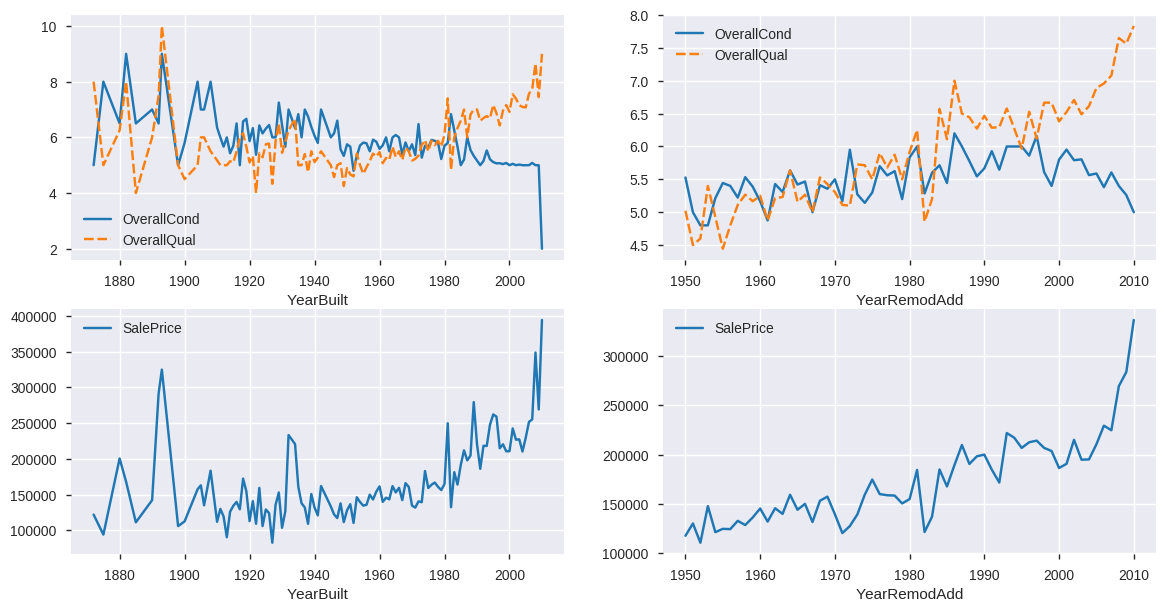

In [ ]:
fig, saxis = plt.subplots(2, 2,figsize=(14,7))

sns.lineplot(data=train[['YearBuilt','OverallCond','OverallQual']].groupby('YearBuilt').mean(),ax=saxis[0,0])
sns.lineplot(data=train[['YearRemodAdd','OverallCond','OverallQual']].groupby('YearRemodAdd').mean(),ax=saxis[0,1])

sns.lineplot(data=train[['YearBuilt','SalePrice']].groupby('YearBuilt').mean(),ax=saxis[1,0])
sns.lineplot(data=train[['YearRemodAdd','SalePrice']].groupby('YearRemodAdd').mean(),ax=saxis[1,1])



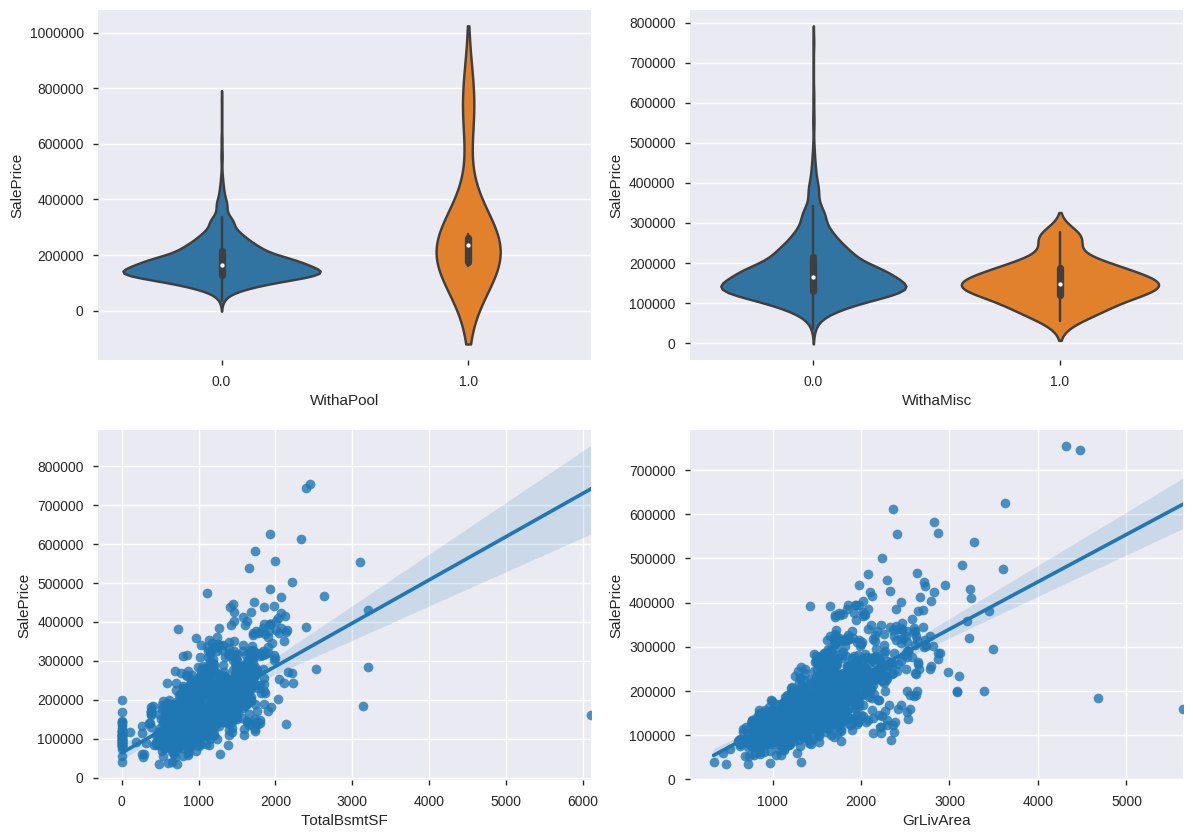

In [ ]:
fig, saxis = plt.subplots(2, 2,figsize=(14,10))
sns.violinplot(x = 'WithaPool', y = 'SalePrice', data=train, ax = saxis[0,0])
sns.violinplot(x = 'WithaMisc', y = 'SalePrice', data=train, ax = saxis[0,1])

sns.regplot(x = 'TotalBsmtSF', y = 'SalePrice', data=train, ax = saxis[1,0])
sns.regplot(x = 'GrLivArea', y = 'SalePrice', data=train, ax = saxis[1,1])



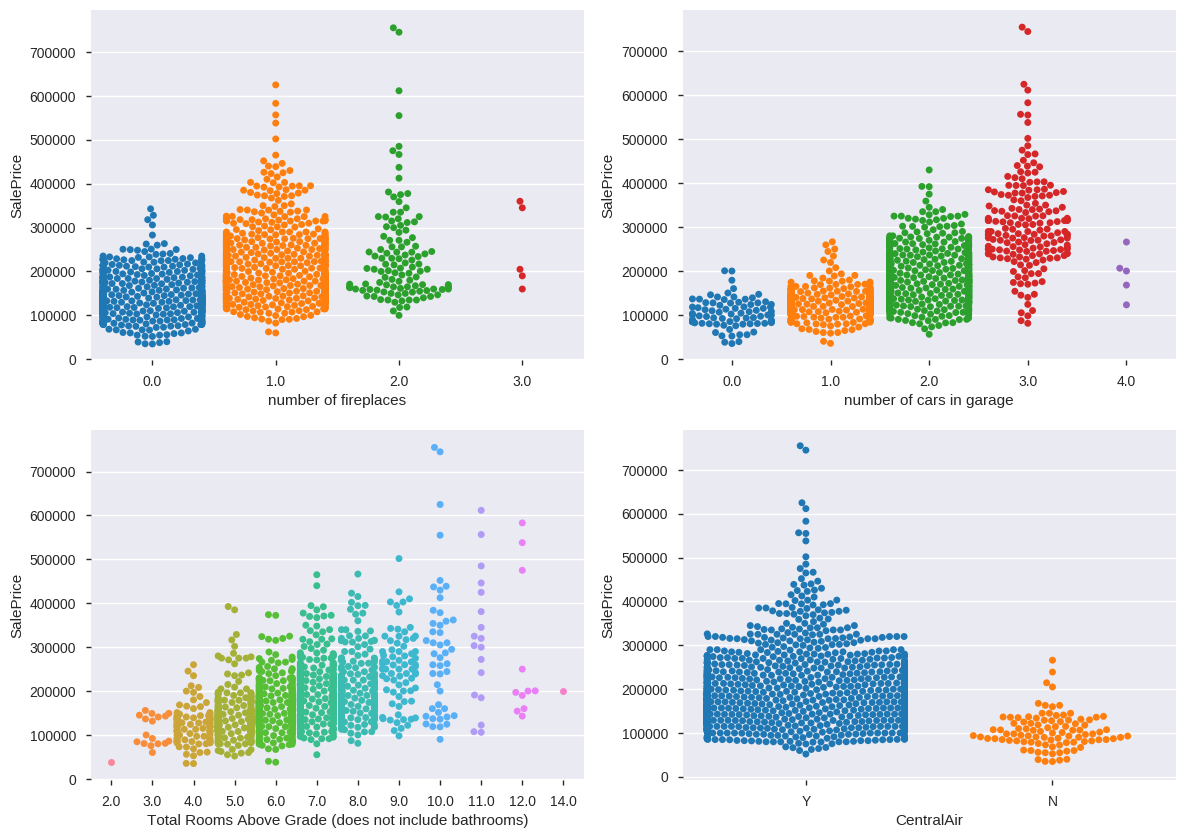

In [ ]:
fig, saxis = plt.subplots(2, 2,figsize=(14,10))
sns.swarmplot(x='Fireplaces',y='SalePrice',data=train,ax = saxis[0,0])
saxis[0,0].set_xlabel('number of fireplaces')

sns.swarmplot(x='GarageCars',y='SalePrice',data=train,ax = saxis[0,1])
saxis[0,1].set_xlabel('number of cars in garage')

sns.swarplot(x='TotRmsAbvGrd',y='SalePrice',data=train,ax = saxis[1,0])
saxis[1,0].set_xlabel('Total Rooms Above Grade (does not include bathrooms)')

sns.swarmplot(x='CentralAir',y='SalePrice',data=train,ax = saxis[1,1])
saxis[1,1].set_xlabel('CentralAir')

plt.show()

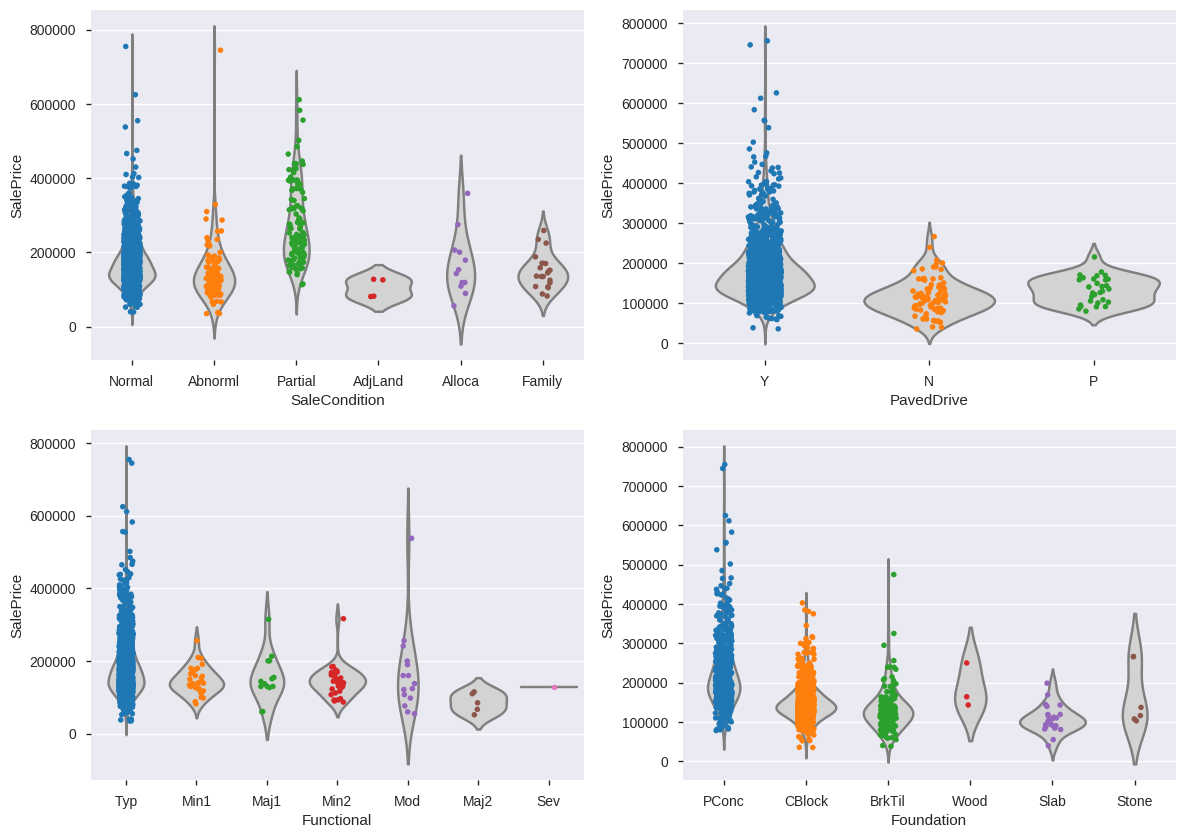

In [ ]:
fig, saxis = plt.subplots(2, 2,figsize=(14,10))

sns.violinplot(x='SaleCondition',y='SalePrice',data=train,inner=None,color='lightgray',ax=saxis[0,0])
sns.stripplot(x='SaleCondition',y='SalePrice',data=train,size=4,jitter=True,ax=saxis[0,0])

sns.violinplot(x='PavedDrive',y='SalePrice',data=train,inner=None,color='lightgray',ax=saxis[0,1])
sns.stripplot(x='PavedDrive',y='SalePrice',data=train,size=4,jitter=True,ax=saxis[0,1])

sns.violinplot(x='Functional',y='SalePrice',data=train,inner=None,color='lightgray',ax=saxis[1,0])
sns.stripplot(x='Functional',y='SalePrice',data=train,size=4,jitter=True,ax=saxis[1,0])

sns.violinplot(x='Foundation',y='SalePrice',data=train,inner=None,color='lightgray',ax=saxis[1,1])
sns.stripplot(x='Foundation',y='SalePrice',data=train,size=4,jitter=True,ax=saxis[1,1])
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [ ]:
le_col=['ExterQual','ExterCond','BsmtCond','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','GarageQual','GarageCond','PavedDrive','Fence']
le_col=list(set(le_col)&set(cat_col))

target=train['SalePrice']
train.drop(['SalePrice'],axis=1,inplace=True)
enc_col=pd.concat([train,test],ignore_index=True)
enc_col=MultiColumnLabelEncoder(columns = le_col).fit_transform(enc_col)

In [ ]:
train.drop(le_col,axis=1,inplace=True)
test.drop(le_col,axis=1,inplace=True)

In [ ]:
cat_col=[col for col in train.columns if train[col].dtype=='object']
ohe_col=pd.concat([train[cat_col],test[cat_col]],axis=1,ignore_index=True)
ohe_col=pd.get_dummies(ohe_col)


In [ ]:
train.drop(cat_col,axis=1,inplace=True)

In [ ]:
train.head()

In [ ]:
def transform(df) :
  df['TotalLivingSF']=df['GrLivArea']+df['TotalBsmtSF'] - df['LowQualFinSF']
  df['AgeSold']=df['YrSold']-df['YearBuilt']
  df['OverallRating']=(df['OverallQual']+df['OverallCond'])/2
  df.drop(['GrLivArea','TotalBsmtSF','LowQualFinSF','YrSold','YearBuilt','OverallQual','OverallCond'],axis=1,inplace=True)

transform(train)
transform(test)

In [ ]:
train.head()

In [ ]:
train=pd.concat([train,target],axis=1)

In [ ]:

_=sns.scatterplot(x='AgeSold',y='SalePrice',data=train)
plt.show()

In [ ]:
train.describe()